# Análisis de Ventas

Análisis temporal de ventas, tendencias y patrones de comportamiento.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (14, 6)

### Cargamos dataset consolidado

In [9]:
df = pd.read_csv('../data/processed/datos_consolidados.csv')
df['fecha'] = pd.to_datetime(df['fecha'])
print(f"✓ {df.shape[0]} registros | {df['fecha'].nunique()} días | {df['id_venta'].nunique()} transacciones")

✓ 343 registros | 93 días | 120 transacciones


## Evolución Mensual

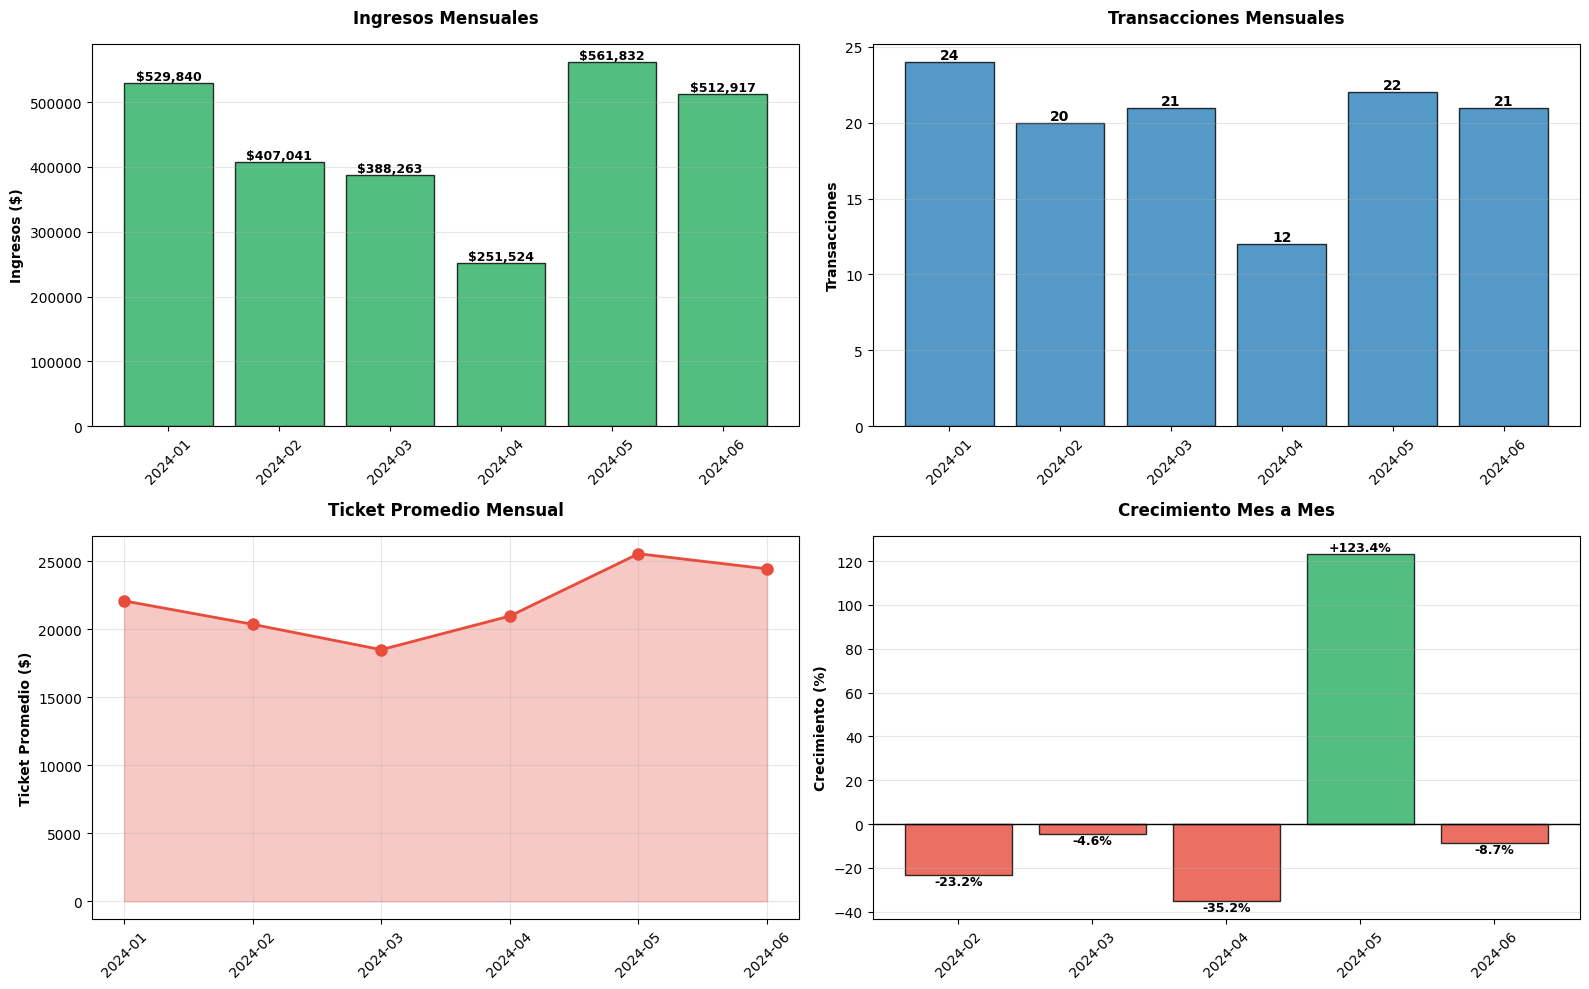


Mejor mes: 2024-05 - $561,832


In [10]:
ventas_mes = df.groupby('mes_nombre').agg({'importe': 'sum', 'id_venta': 'nunique', 'mes': 'first'}).reset_index()
ventas_mes.columns = ['Mes', 'Ingresos', 'Ventas', 'Mes_Num']
ventas_mes = ventas_mes.sort_values('Mes_Num')
ventas_mes['Ticket_Prom'] = ventas_mes['Ingresos'] / ventas_mes['Ventas']
ventas_mes['Crecimiento'] = ventas_mes['Ingresos'].pct_change() * 100

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Ingresos
axes[0,0].bar(ventas_mes['Mes'], ventas_mes['Ingresos'], color='#27ae60', alpha=0.8, edgecolor='black')
axes[0,0].set_ylabel('Ingresos ($)', fontweight='bold')
axes[0,0].set_title('Ingresos Mensuales', fontweight='bold', pad=15)
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(axis='y', alpha=0.3)
for i, v in enumerate(ventas_mes['Ingresos']):
    axes[0,0].text(i, v, f'${v:,.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Transacciones
axes[0,1].bar(ventas_mes['Mes'], ventas_mes['Ventas'], color='#2980b9', alpha=0.8, edgecolor='black')
axes[0,1].set_ylabel('Transacciones', fontweight='bold')
axes[0,1].set_title('Transacciones Mensuales', fontweight='bold', pad=15)
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(axis='y', alpha=0.3)
for i, v in enumerate(ventas_mes['Ventas']):
    axes[0,1].text(i, v, f'{v}', ha='center', va='bottom', fontweight='bold')

# Ticket promedio
axes[1,0].plot(ventas_mes['Mes'], ventas_mes['Ticket_Prom'], marker='o', linewidth=2, markersize=8, color='#e74c3c')
axes[1,0].fill_between(range(len(ventas_mes)), ventas_mes['Ticket_Prom'], alpha=0.3, color='#e74c3c')
axes[1,0].set_ylabel('Ticket Promedio ($)', fontweight='bold')
axes[1,0].set_title('Ticket Promedio Mensual', fontweight='bold', pad=15)
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(alpha=0.3)

# Crecimiento
crec = ventas_mes.dropna(subset=['Crecimiento'])
colors_c = ['#27ae60' if x >= 0 else '#e74c3c' for x in crec['Crecimiento']]
axes[1,1].bar(crec['Mes'], crec['Crecimiento'], color=colors_c, alpha=0.8, edgecolor='black')
axes[1,1].axhline(0, color='black', linewidth=1)
axes[1,1].set_ylabel('Crecimiento (%)', fontweight='bold')
axes[1,1].set_title('Crecimiento Mes a Mes', fontweight='bold', pad=15)
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(axis='y', alpha=0.3)
for i, v in enumerate(crec['Crecimiento']):
    axes[1,1].text(i, v, f'{v:+.1f}%', ha='center', va='bottom' if v >= 0 else 'top', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

mejor_mes = ventas_mes.loc[ventas_mes['Ingresos'].idxmax()]
print(f"\nMejor mes: {mejor_mes['Mes']} - ${mejor_mes['Ingresos']:,.0f}")

## Tendencia Diaria

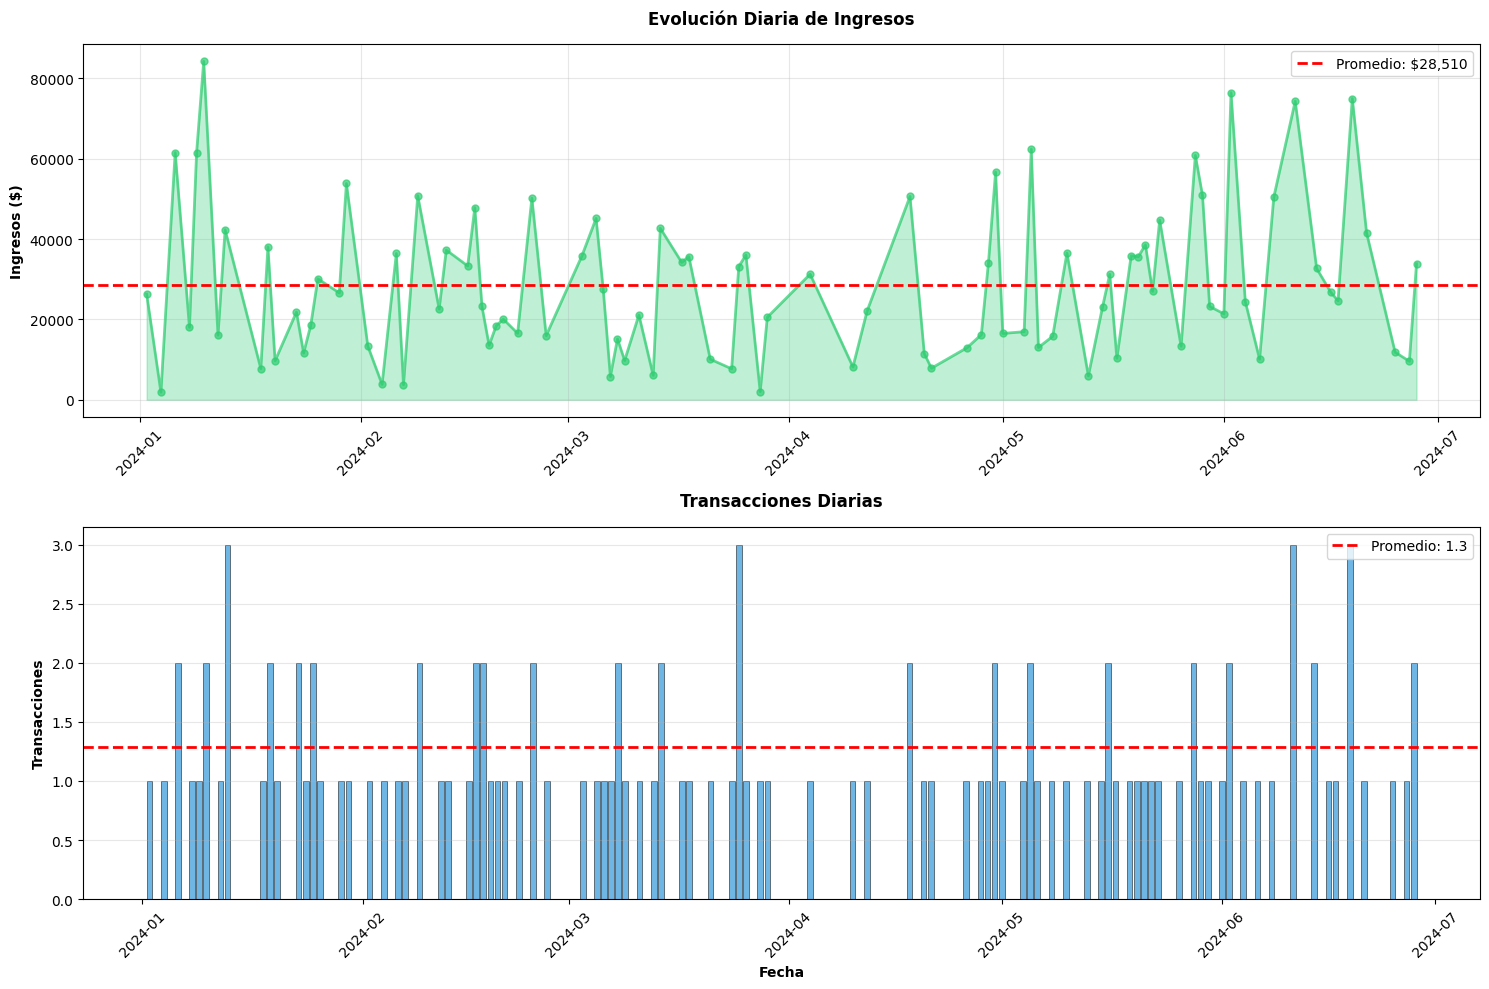

In [11]:
ventas_dia = df.groupby('fecha').agg({'importe': 'sum', 'id_venta': 'nunique'}).reset_index()
ventas_dia.columns = ['Fecha', 'Ingresos', 'Ventas']

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Ingresos
axes[0].plot(ventas_dia['Fecha'], ventas_dia['Ingresos'], marker='o', linewidth=2, markersize=5, color='#2ecc71', alpha=0.7)
axes[0].axhline(ventas_dia['Ingresos'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f"Promedio: ${ventas_dia['Ingresos'].mean():,.0f}")
axes[0].fill_between(ventas_dia['Fecha'], ventas_dia['Ingresos'], alpha=0.3, color='#2ecc71')
axes[0].set_ylabel('Ingresos ($)', fontweight='bold')
axes[0].set_title('Evolución Diaria de Ingresos', fontweight='bold', pad=15)
axes[0].legend()
axes[0].grid(alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Transacciones
axes[1].bar(ventas_dia['Fecha'], ventas_dia['Ventas'], color='#3498db', alpha=0.7, edgecolor='black', linewidth=0.5)
axes[1].axhline(ventas_dia['Ventas'].mean(), color='red', linestyle='--', linewidth=2,
                label=f"Promedio: {ventas_dia['Ventas'].mean():.1f}")
axes[1].set_ylabel('Transacciones', fontweight='bold')
axes[1].set_xlabel('Fecha', fontweight='bold')
axes[1].set_title('Transacciones Diarias', fontweight='bold', pad=15)
axes[1].legend()
axes[1].grid(alpha=0.3, axis='y')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Patrones Semanales

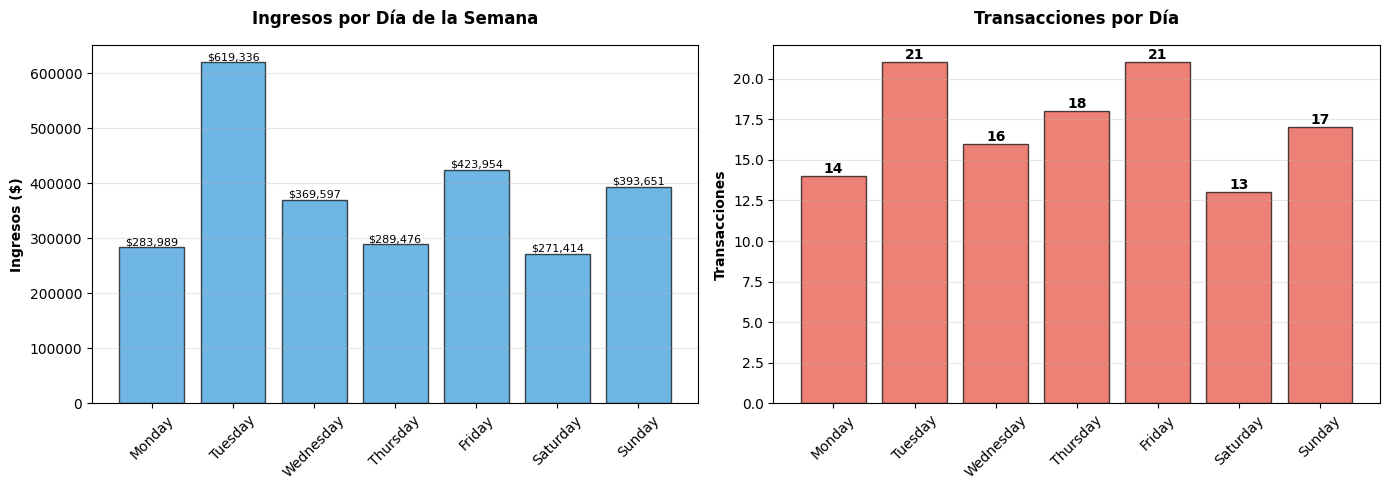

Mejor día: Tuesday - $619,336


In [12]:
ventas_semana = df.groupby('dia_semana').agg({'importe': 'sum', 'id_venta': 'nunique'}).reset_index()
ventas_semana.columns = ['Dia', 'Ingresos', 'Ventas']

# Ordenar días
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_semana['Dia'] = pd.Categorical(ventas_semana['Dia'], categories=dias_orden, ordered=True)
ventas_semana = ventas_semana.sort_values('Dia')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Ingresos
axes[0].bar(ventas_semana['Dia'], ventas_semana['Ingresos'], color='#3498db', edgecolor='black', alpha=0.7)
axes[0].set_ylabel('Ingresos ($)', fontweight='bold')
axes[0].set_title('Ingresos por Día de la Semana', fontweight='bold', pad=15)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(ventas_semana['Ingresos']):
    axes[0].text(i, v, f'${v:,.0f}', ha='center', va='bottom', fontsize=8)

# Transacciones
axes[1].bar(ventas_semana['Dia'], ventas_semana['Ventas'], color='#e74c3c', edgecolor='black', alpha=0.7)
axes[1].set_ylabel('Transacciones', fontweight='bold')
axes[1].set_title('Transacciones por Día', fontweight='bold', pad=15)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(ventas_semana['Ventas']):
    axes[1].text(i, v, f'{v}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

mejor_dia = ventas_semana.loc[ventas_semana['Ingresos'].idxmax()]
print(f"Mejor día: {mejor_dia['Dia']} - ${mejor_dia['Ingresos']:,.0f}")

### Histogramas

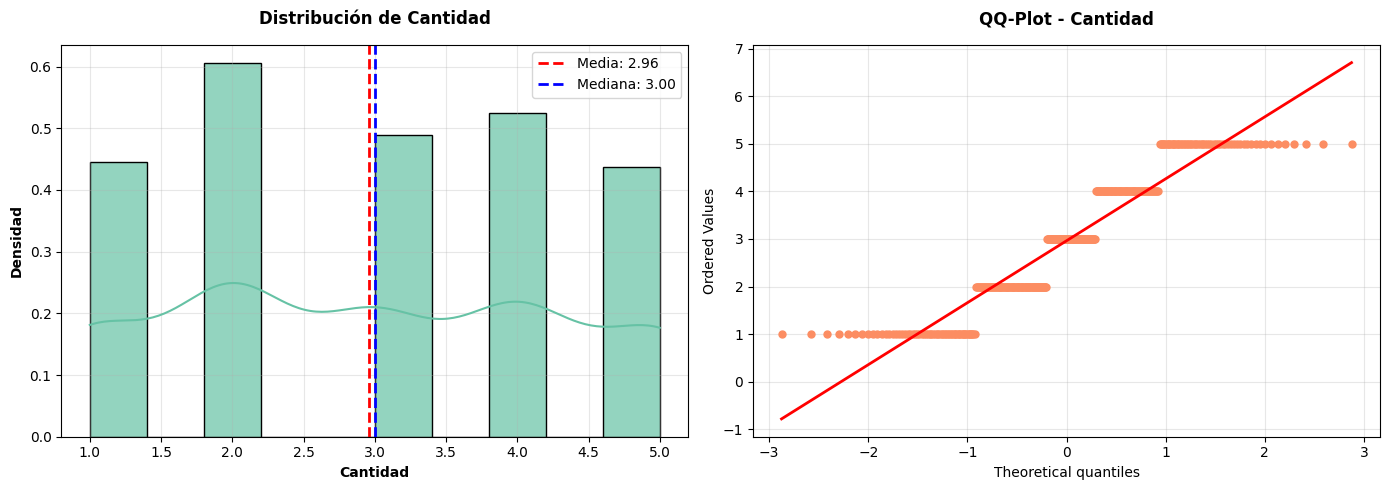


CANTIDAD
  Media: 2.96 | Mediana: 3.00 | Desv.Est: 1.37
  Shapiro-Wilk p-value: 0.0000 → ✗ No Normal


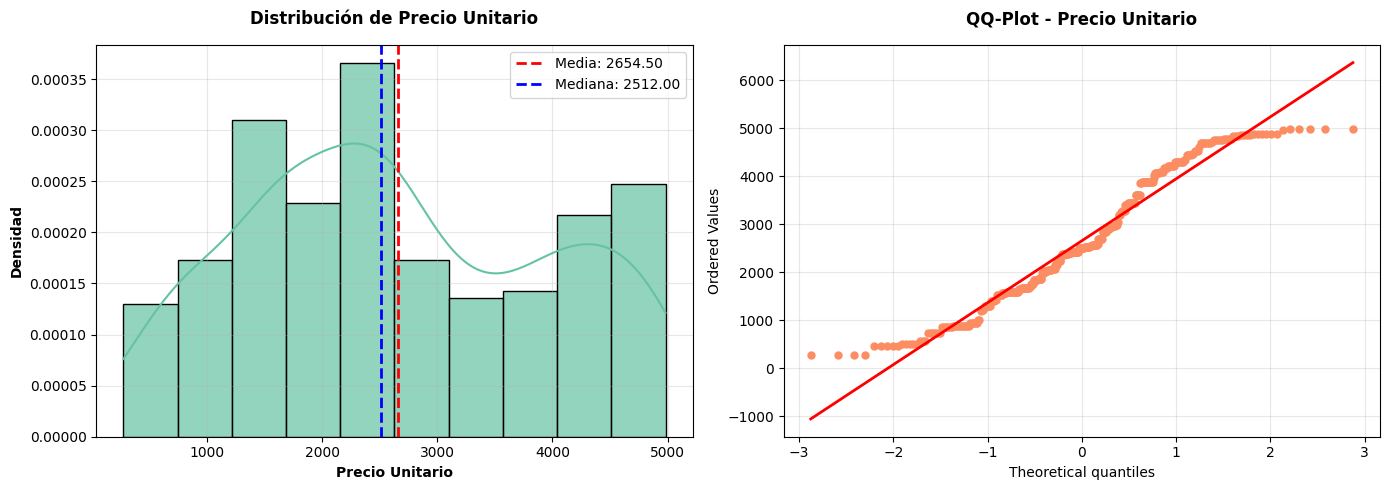


PRECIO_UNITARIO
  Media: 2654.50 | Mediana: 2512.00 | Desv.Est: 1308.69
  Shapiro-Wilk p-value: 0.0000 → ✗ No Normal


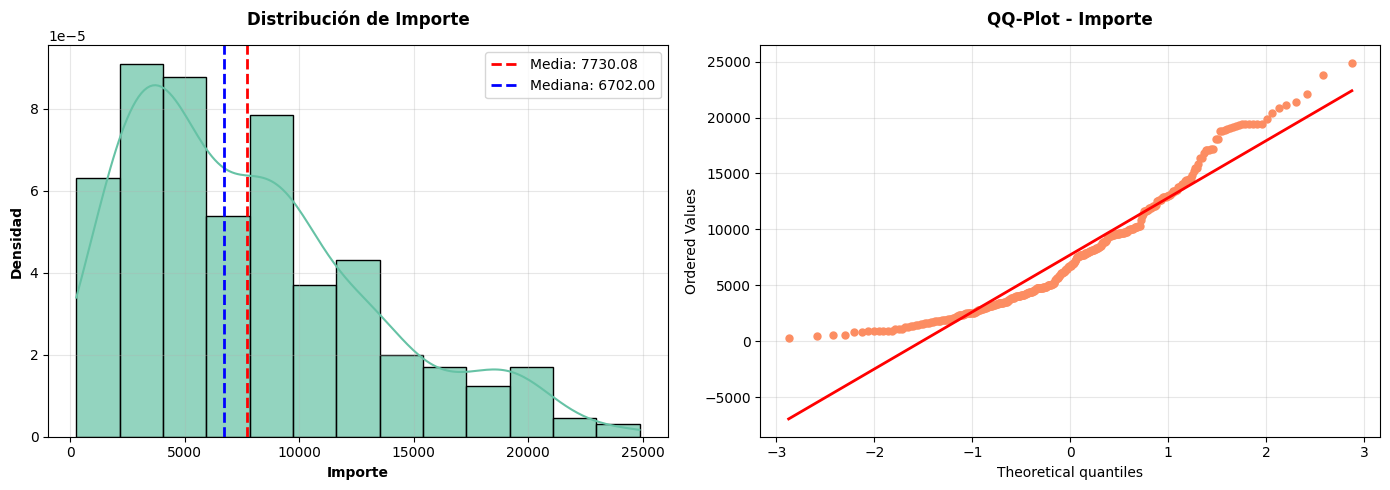


IMPORTE
  Media: 7730.08 | Mediana: 6702.00 | Desv.Est: 5265.54
  Shapiro-Wilk p-value: 0.0000 → ✗ No Normal


In [13]:
# Variables numéricas clave a analizar
variables = ['cantidad', 'precio_unitario', 'importe']

for var in variables:
    # Preparar datos
    data = pd.to_numeric(df[var], errors='coerce').dropna()
    
    # Crear figura con 2 subplots: Histograma+KDE y QQ-plot
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # 1. Histograma + KDE
    sns.histplot(data, kde=True, stat='density', ax=axes[0], color='#66c2a5', edgecolor='black', alpha=0.7)
    axes[0].set_title(f'Distribución de {var.replace("_", " ").title()}', fontweight='bold', pad=15)
    axes[0].set_xlabel(var.replace("_", " ").title(), fontweight='bold')
    axes[0].set_ylabel('Densidad', fontweight='bold')
    axes[0].grid(alpha=0.3)
    
    # Agregar media y mediana
    axes[0].axvline(data.mean(), color='red', linestyle='--', linewidth=2, 
                    label=f'Media: {data.mean():.2f}')
    axes[0].axvline(data.median(), color='blue', linestyle='--', linewidth=2,
                    label=f'Mediana: {data.median():.2f}')
    axes[0].legend()
    
    # 2. QQ-plot (para evaluar normalidad)
    stats.probplot(data, dist='norm', plot=axes[1])
    axes[1].set_title(f'QQ-Plot - {var.replace("_", " ").title()}', fontweight='bold', pad=15)
    axes[1].grid(alpha=0.3)
    axes[1].get_lines()[0].set_color('#fc8d62')
    axes[1].get_lines()[0].set_markersize(5)
    axes[1].get_lines()[1].set_color('red')
    axes[1].get_lines()[1].set_linewidth(2)
    
    plt.tight_layout()
    plt.show()
    
    # Test de normalidad Shapiro-Wilk
    stat, p_value = stats.shapiro(data[:5000] if len(data) > 5000 else data)  # Shapiro limita a 5000
    normalidad = "✓ Distribución Normal" if p_value > 0.05 else "✗ No Normal"
    
    print(f"\n{var.upper()}")
    print(f"  Media: {data.mean():.2f} | Mediana: {data.median():.2f} | Desv.Est: {data.std():.2f}")
    print(f"  Shapiro-Wilk p-value: {p_value:.4f} → {normalidad}")